<a href="https://colab.research.google.com/github/miguel05mex78-bot/DataScienceMastery/blob/main/Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Environment preparation*#

## Install scikit-optimize


In Colab notebooks, some libraries like seaborn and pandas are already installed. However, you need to install another libraries like scikit optimize (skopt). The code **pip install scikit-optimize** install the last available skopt version. You can go to https://scikit-optimize.github.io/dev/whats_new.html to check skopt releases

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.4 MB/s eta 0:00:00


## Loading libraries

**Bayesian Optimization** is carried out by **BayesSearchCV** function from skopt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process,plot_evaluations
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from skopt import BayesSearchCV

#Data preparation and exploration

We need to explore the data

<ipython-input-3-e859045b7b9d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['blue', 'orange'])


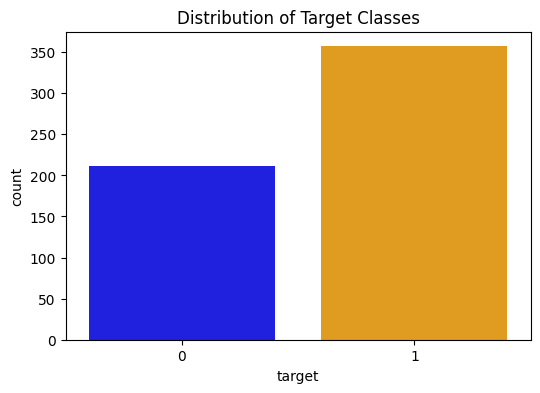

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Plot the distribution of  classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette=['blue', 'orange'])
plt.title('Distribution of Target Classes')
plt.xticks(ticks=[0, 1], labels=['0', '1'])  #
plt.show()

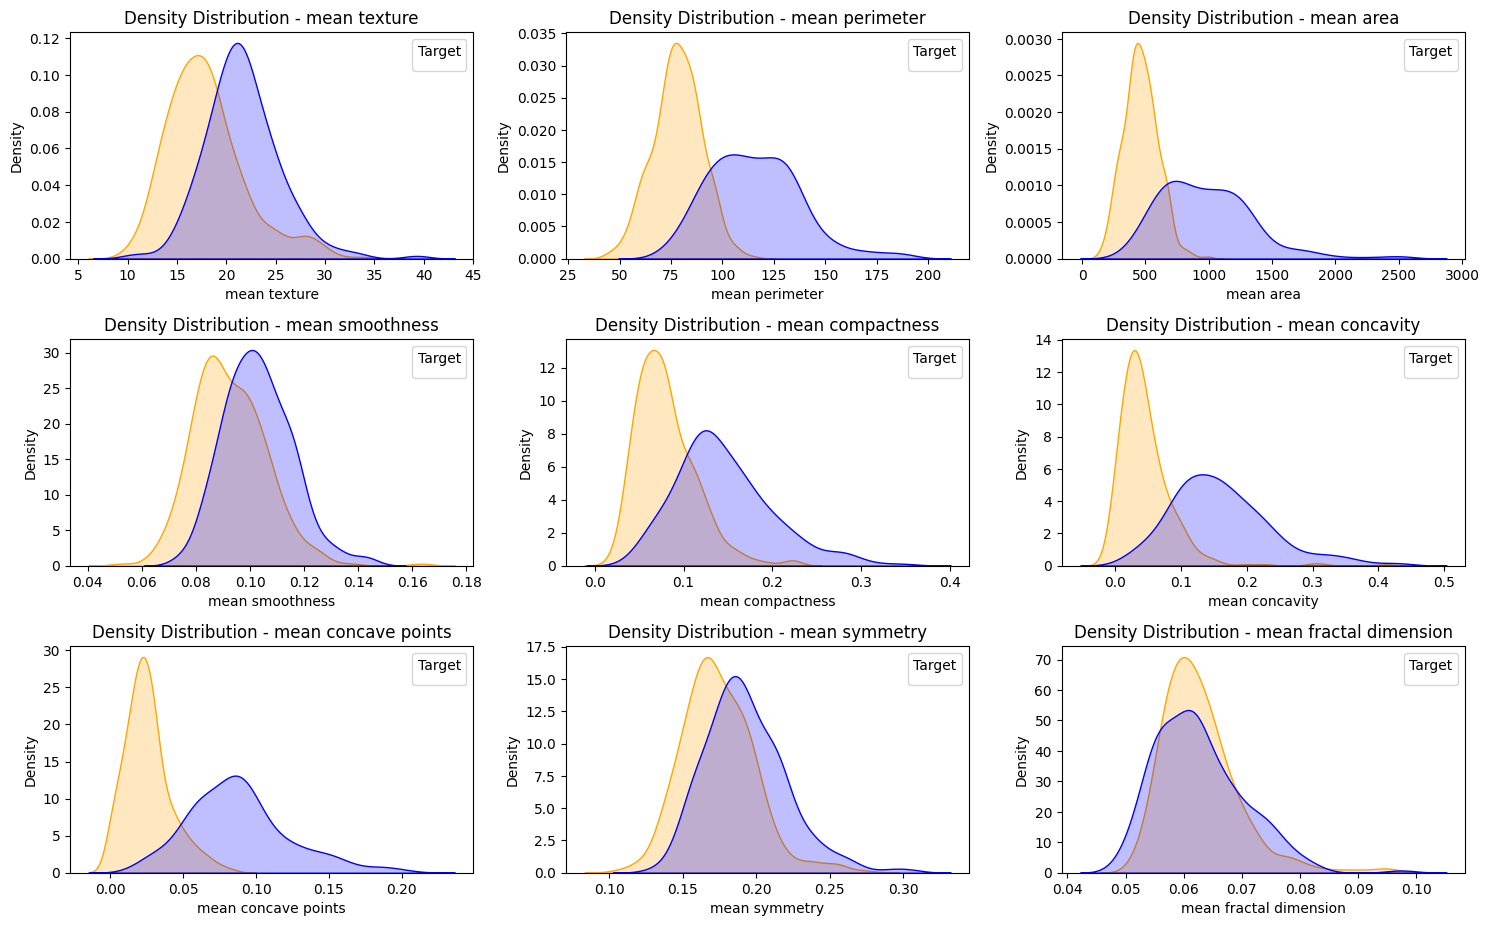

In [ ]:
# Selected feature names
selected_features = ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
                     'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Filter the DataFrame based on selected features
df_selected = pd.DataFrame(data.data, columns=data.feature_names)[selected_features]
df_selected['target'] = data.target

# Plot the density distribution for each selected feature in the same grid
plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features, start=1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data=df_selected, x=feature, hue='target', fill=True, common_norm=False, palette={0: 'blue', 1: 'orange'})
    plt.title(f'Density Distribution - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()

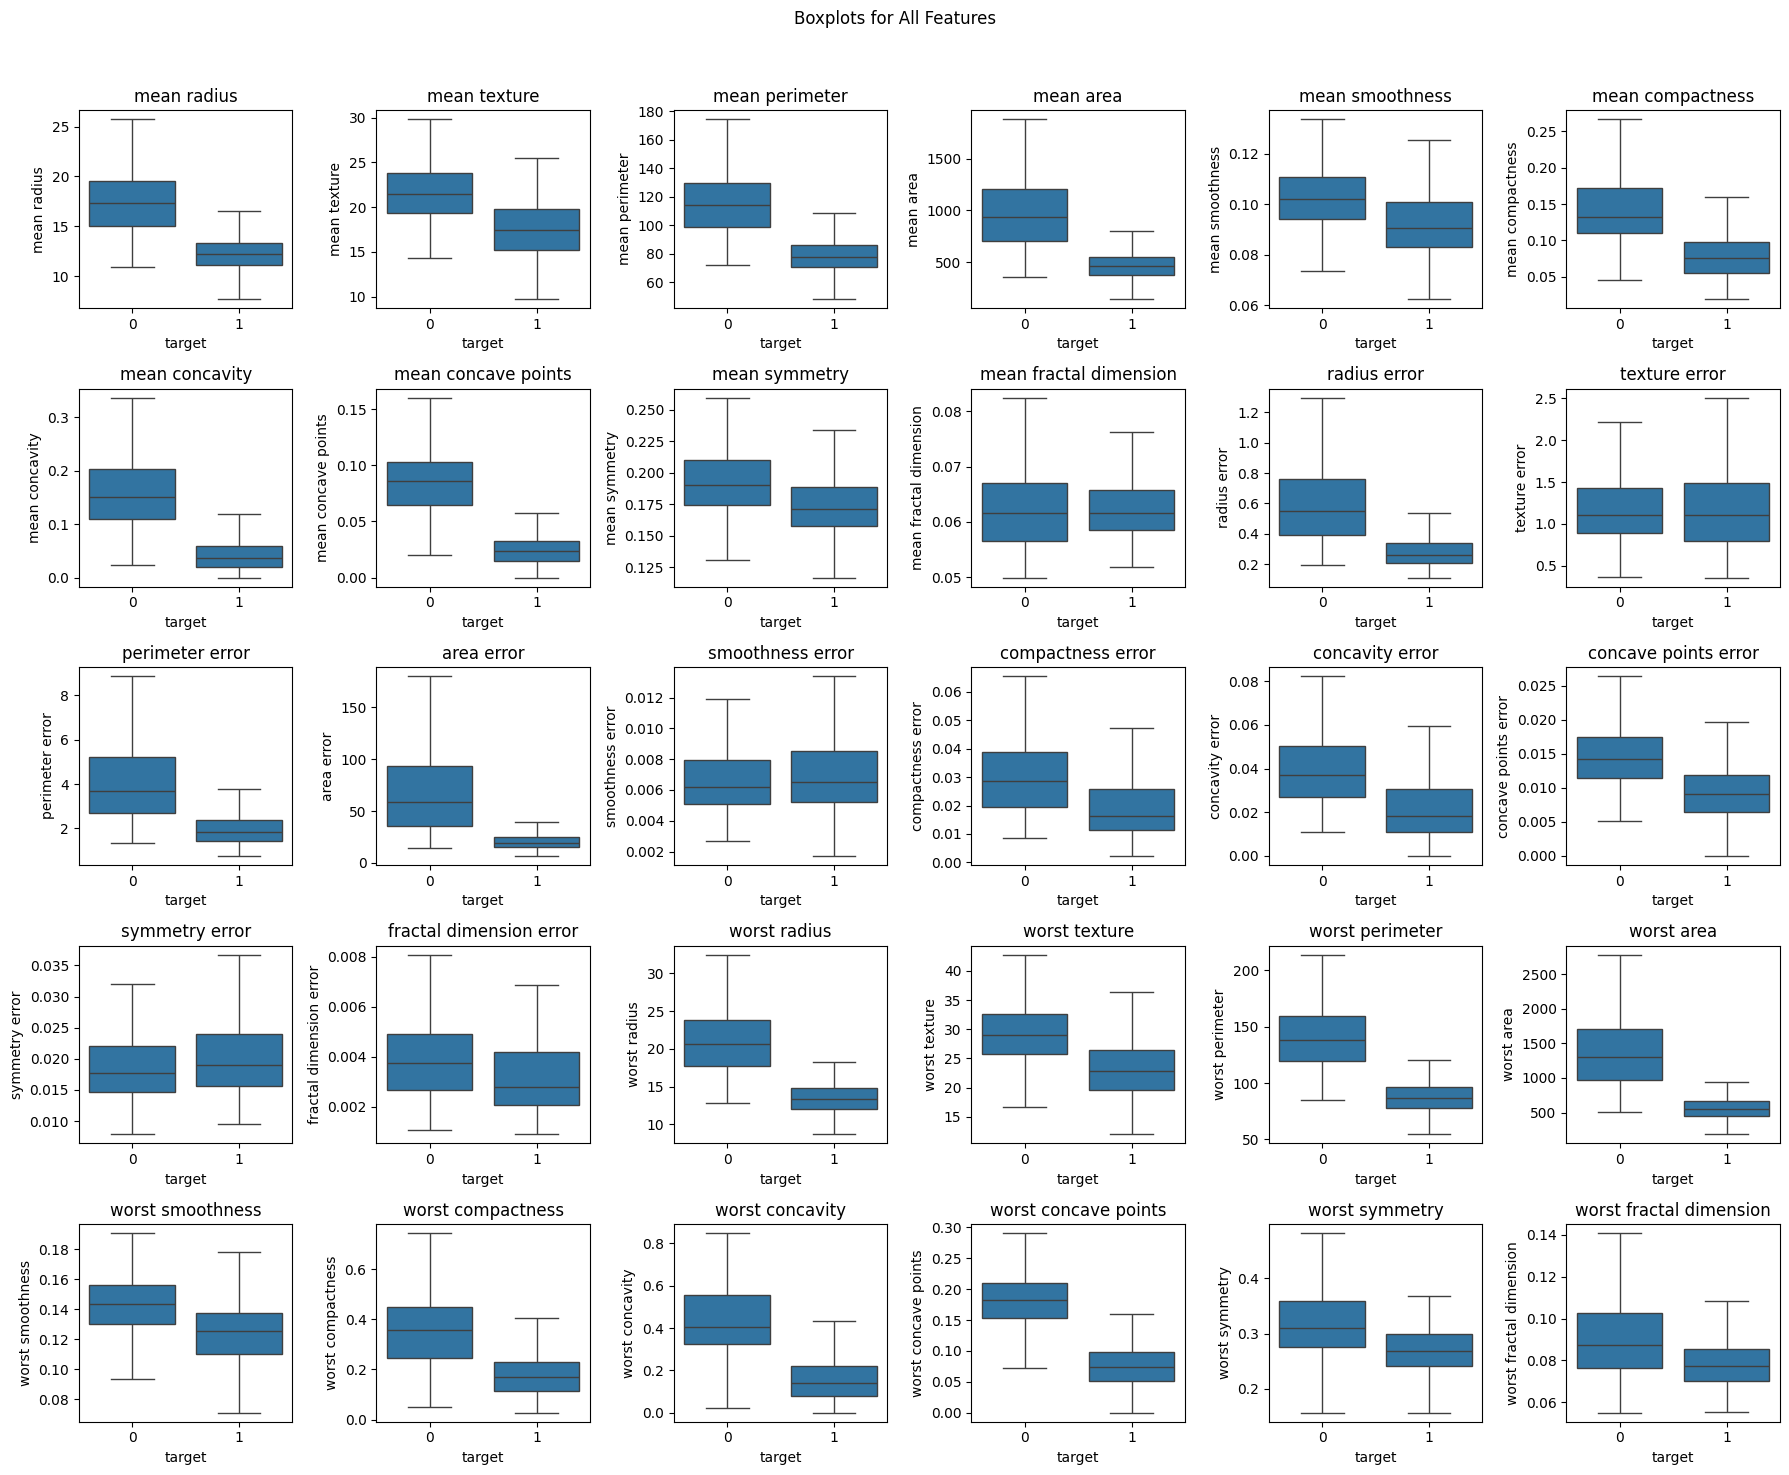

In [ ]:
# Create subplots for all 30 features
fig, axes = plt.subplots(5, 6, figsize=(18, 15))
fig.suptitle('Boxplots for All Features')

for i, feature in enumerate(df.columns[:-1]):  # Exclude the target variable
    sns.boxplot(ax=axes[i // 6, i % 6], x='target', y=feature, data=df, showfliers=False)
    axes[i // 6, i % 6].set_title(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 1200x800 with 0 Axes>

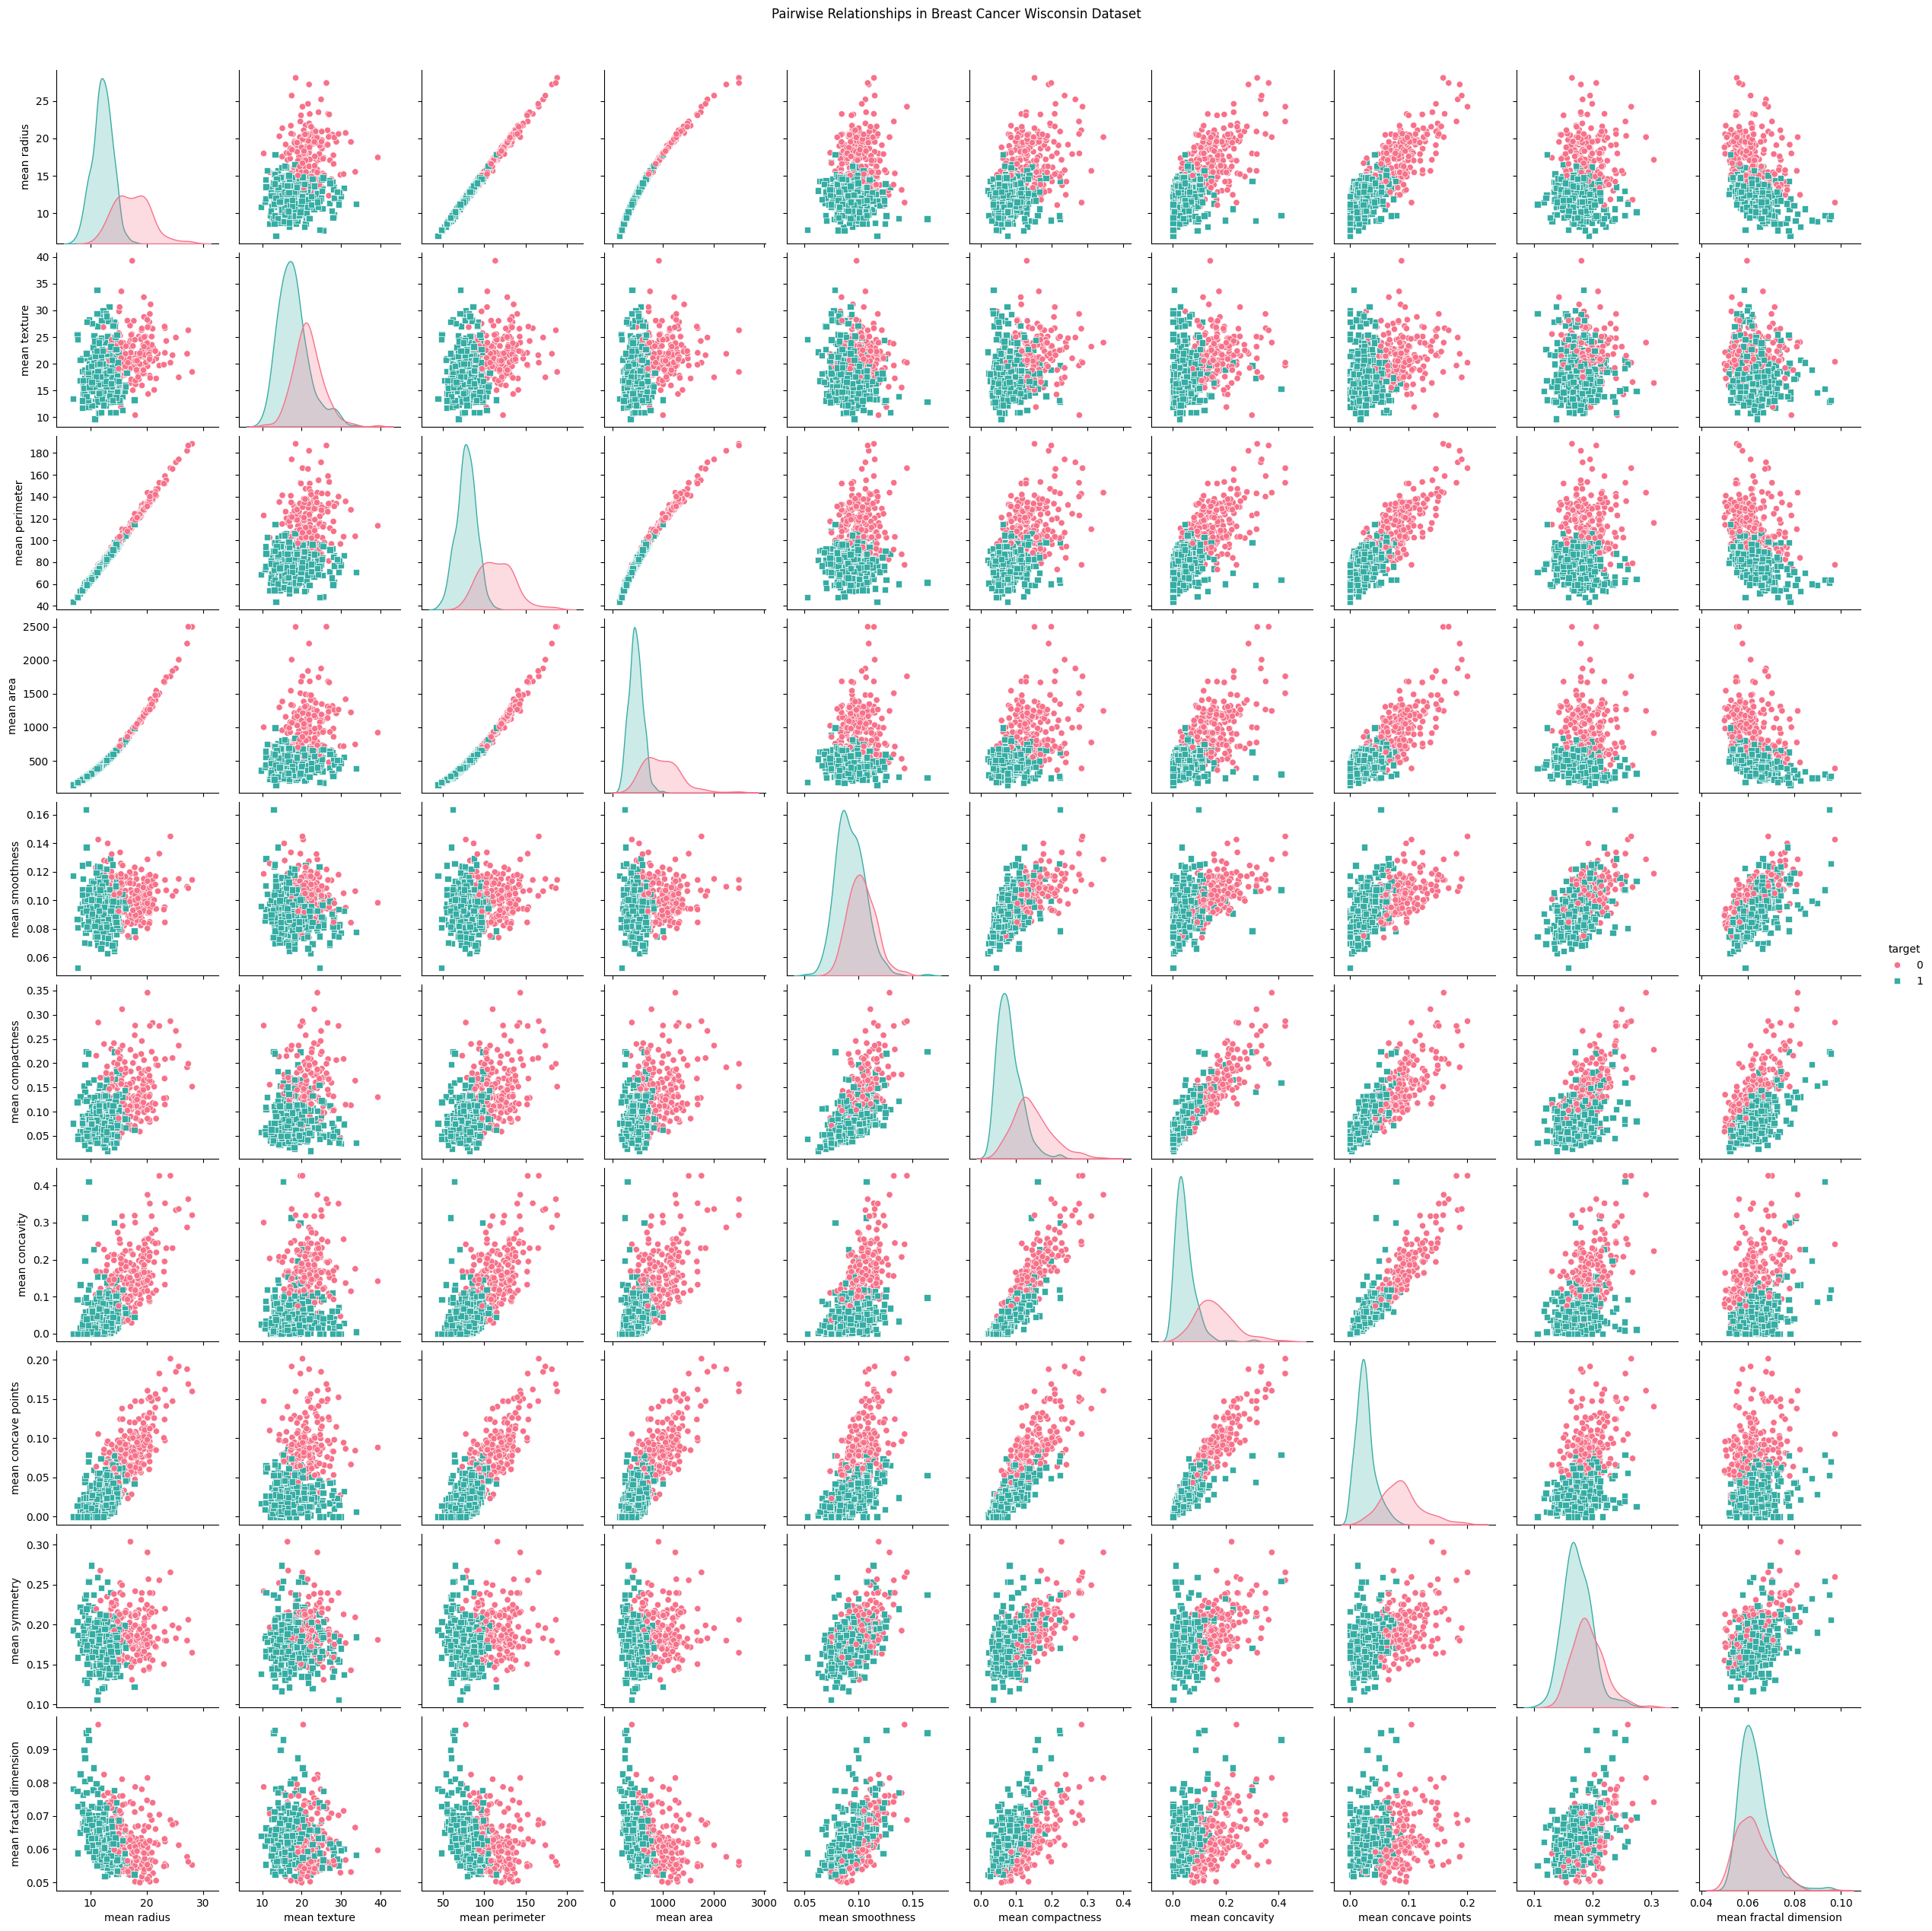

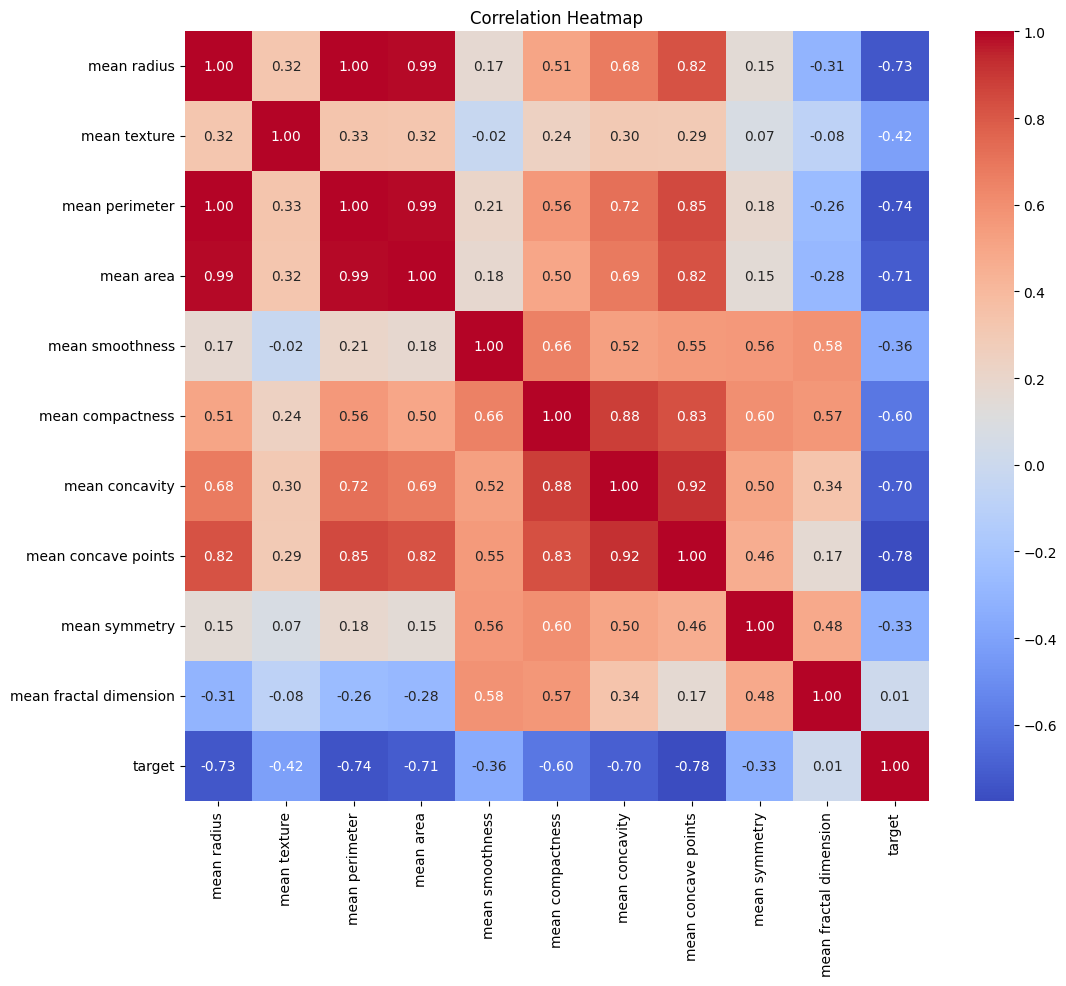

In [ ]:
# Selected feature names
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
                     'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Filter the DataFrame based on selected features
df_selected = pd.DataFrame(data.data, columns=data.feature_names)[selected_features]
df_selected['target'] = data.target

# Plot a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df_selected, hue='target', markers=['o', 's'], palette='husl')
plt.suptitle('Pairwise Relationships in Breast Cancer Wisconsin Dataset', y=1.02)
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Optimization and testing

## Bayesian Optimization


### SVM

Let's start optimizing a SVM model with cancer dataset

In [ ]:
# Load the Breast Cancer Wisconsin dataset
# data = load_breast_cancer()
X, y = data.data, data.target

# Step 1: Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the hyperparameter space
param_space = {'C': [0.1, 1, 10, 15],
               'gamma': [0.1, 1],
               'kernel': ['rbf', 'linear']}


# param_space =  {'C': [0.1, 1, 10],
#                    'gamma': [ 0.1,0.5, 1],
#                    'degree': [2,3],
#                    'kernel': ['rbf', 'linear', 'poly']}



bayes_cv = BayesSearchCV(
    SVC(),
    param_space,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

np.int = int

# Fit the BayesSearchCV object
bayes_cv.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params = bayes_cv.best_params_

# Step 6: Train the model on the complete training set with the best hyperparameters
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Step 7: Evaluate the final trained model on the test set
test_accuracy = best_model.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:110: UserWarning: Dimension [0.1, 1] was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.1, 1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:110: UserWarning: Dimension [0.1, 1] was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.1, 1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:110: UserWarning: Dimension [0.1, 1] was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred

In [ ]:
# Print Results
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: OrderedDict([('C', 10), ('gamma', 0.10053969664318647), ('kernel', 'linear')])
Test Set Accuracy: 0.956140350877193


Beyond optimization, we can determine how specific features impact performance

array([[<Axes: xlabel='C', ylabel='Partial dependence'>, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='gamma'>,
        <Axes: xlabel='gamma', ylabel='Partial dependence'>, <Axes: >],
       [<Axes: xlabel='C', ylabel='kernel'>, <Axes: xlabel='gamma'>,
        <Axes: xlabel='kernel', ylabel='Partial dependence'>]],
      dtype=object)

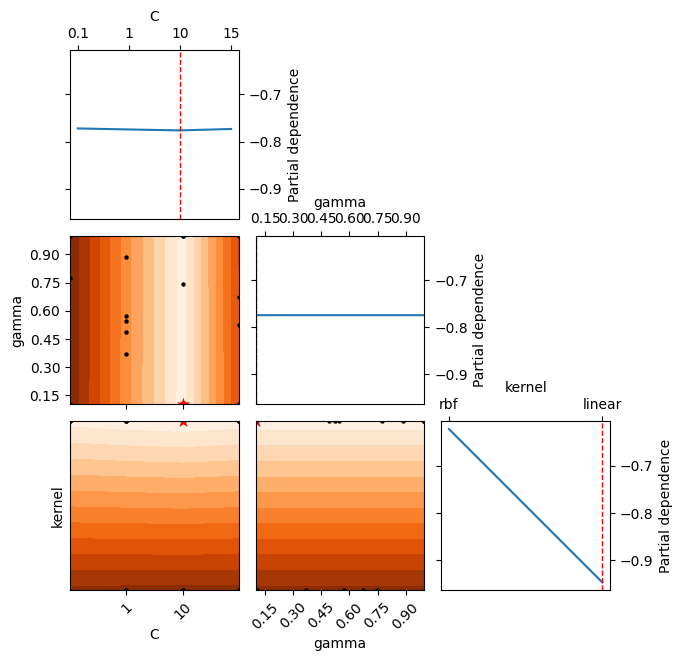

In [ ]:
plot_objective(bayes_cv.optimizer_results_[0], cmap='Oranges')

Also, we can see at which iteration, the process found the best performance

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

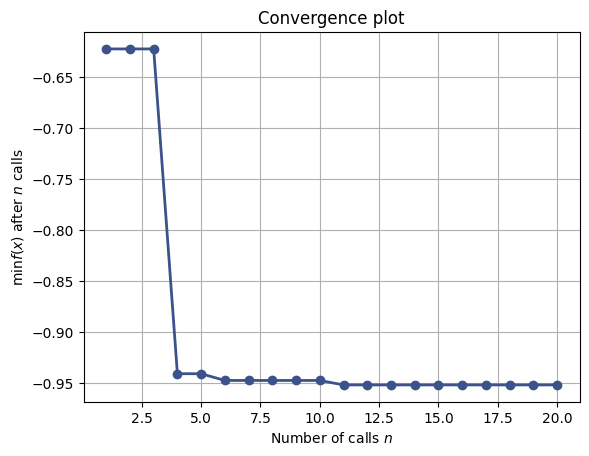

In [ ]:
plot_convergence(bayes_cv.optimizer_results_[0])

### Extreme Gradient Boosting

In [ ]:
## xgb
from xgboost import XGBClassifier


# Load the Breast Cancer Wisconsin dataset
# data = load_breast_cancer()
# X, y = data.data, data.target

# # Step 1: Create training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the hyperparameter space for XGBoost
param_space_xgb = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'max_depth': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'min_child_weight': (1, 10)
}

# Step 3: Perform Bayesian optimization using BayesSearchCV
bayes_cv_xgb = BayesSearchCV(
    XGBClassifier(),
    param_space_xgb,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

np.int = int
# Fit the BayesSearchCV object
bayes_cv_xgb.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params_xgb = bayes_cv_xgb.best_params_

# Step 6: Train the model on the complete training set with the best hyperparameters
best_model_xgb = XGBClassifier(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)

# Step 7: Evaluate the final trained model on the test set
test_accuracy_xgb = best_model_xgb.score(X_test, y_test)


In [ ]:
# Print Results
print("Best Hyperparameters:", best_params_xgb)
print("Best Cross-Validation Accuracy:", bayes_cv_xgb.best_score_)
print("Test Set Accuracy:", test_accuracy_xgb)

Best Hyperparameters: OrderedDict([('learning_rate', 0.5089796995561985), ('max_depth', 3), ('min_child_weight', 2), ('n_estimators', 131), ('subsample', 0.41003563926726516)])
Best Cross-Validation Accuracy: 0.9648351648351647
Test Set Accuracy: 0.9473684210526315


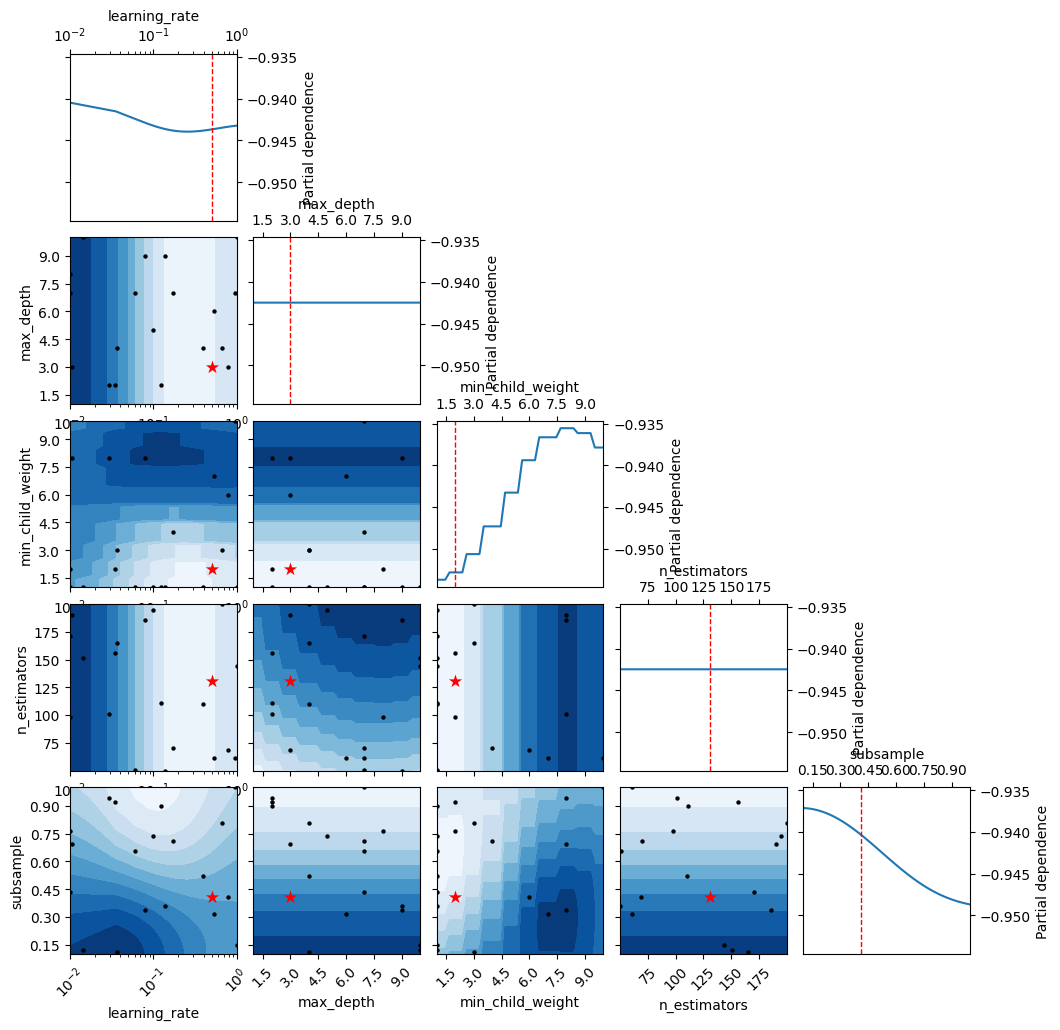

In [ ]:
## xgb

# Plot the objective
from skopt.plots import plot_objective

plot_objective(bayes_cv_xgb.optimizer_results_[0], cmap='Blues')
plt.show()

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

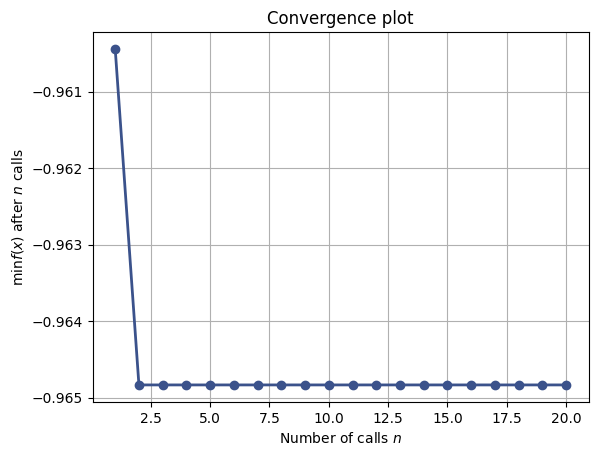

In [ ]:
## xgb
plot_convergence(bayes_cv_xgb.optimizer_results_[0])

## Deep Learning

### Neural Networks

As we now, neural networks automatically determine wheights for features, they do not select the number of hidden layers, activation functions, and another parameters. We can do it with Bayesian Opimization

In [ ]:
## ANN
from sklearn.neural_network import MLPClassifier

# # Load the Breast Cancer Wisconsin dataset
# data = load_breast_cancer()
# X, y = data.data, data.target

# # Step 1: Create training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the hyperparameter space
param_space = {
    'alpha': (1e-5, 1e-2, 'log-uniform'),
    'hidden_layer_sizes': [20, 50, 100],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'solver': ['lbfgs', 'sgd', 'adam']
}



# Step 3: Define the objective function
# MLPClassifier()

# Step 4: Perform Bayesian optimization using BayesSearchCV
bayes_cv = BayesSearchCV(
    MLPClassifier(),
    param_space,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the BayesSearchCV object
bayes_cv.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params = bayes_cv.best_params_

# Step 6: Train the model on the complete training set with the best hyperparameters
best_model = MLPClassifier(**best_params)
best_model.fit(X_train, y_train)

# Step 7: Evaluate the final trained model on the test set
test_accuracy = best_model.score(X_test, y_test)



/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, sel

In [ ]:
## ANN
# Print Results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", bayes_cv.best_score_)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: OrderedDict([('activation', 'logistic'), ('alpha', 0.007635234552201229), ('hidden_layer_sizes', 100), ('learning_rate', 'invscaling'), ('solver', 'lbfgs')])
Best Cross-Validation Accuracy: 0.9428571428571428
Test Set Accuracy: 0.9122807017543859


array([[<Axes: xlabel='activation', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='alpha'>,
        <Axes: xlabel='alpha', ylabel='Partial dependence'>, <Axes: >,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='hidden_layer_sizes'>, <Axes: >,
        <Axes: xlabel='hidden_layer_sizes', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='learning_rate'>, <Axes: >, <Axes: >,
        <Axes: xlabel='learning_rate', ylabel='Partial dependence'>,
        <Axes: >],
       [<Axes: xlabel='activation', ylabel='solver'>,
        <Axes: xlabel='alpha'>, <Axes: xlabel='hidden_layer_sizes'>,
        <Axes: xlabel='learning_rate'>,
        <Axes: xlabel='solver', ylabel='Partial dependence'>]],
      dtype=object)

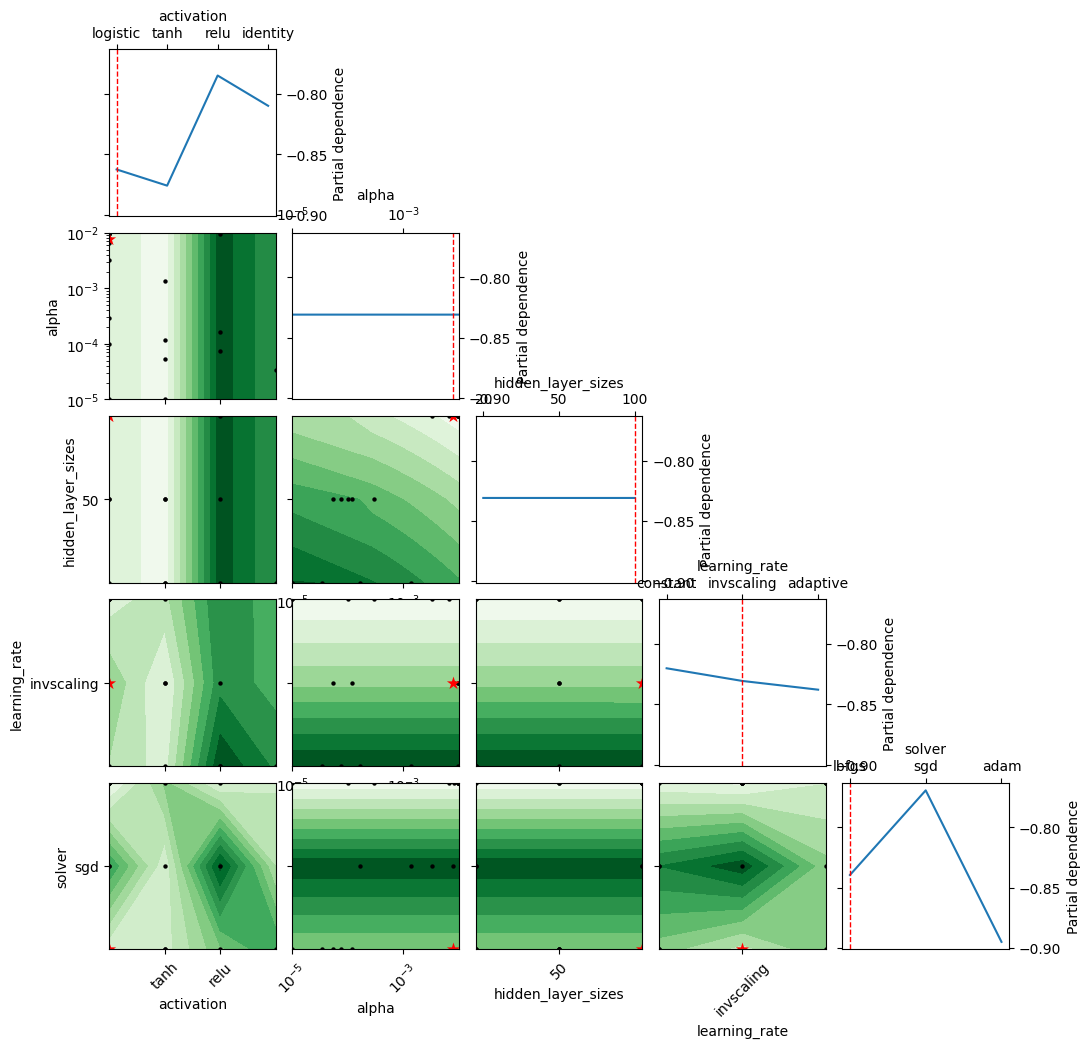

In [ ]:
## ANN

plot_objective(bayes_cv.optimizer_results_[0], cmap='Greens')

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

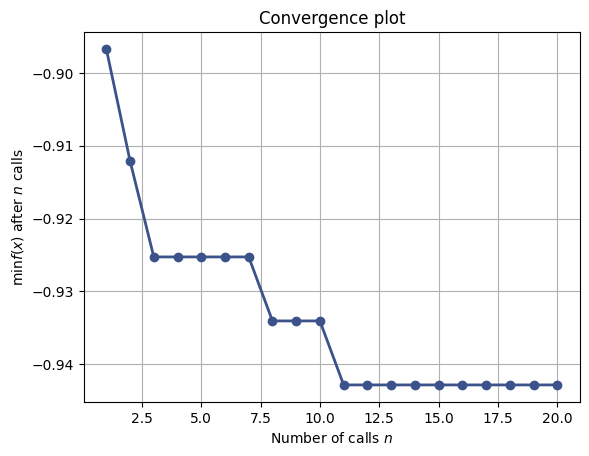

In [ ]:
## ANN

plot_convergence(bayes_cv.optimizer_results_[0])